In [1]:
%pylab inline --no-import-all



Populating the interactive namespace from numpy and matplotlib


# Hromadná práce se soubory

In [ ]:
from skimage.io import imread


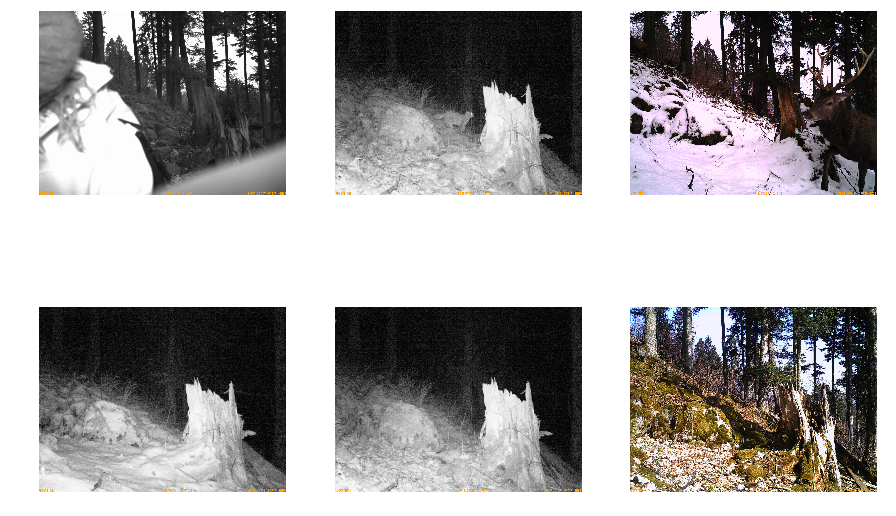

In [11]:
import glob
import matplotlib.pyplot as plt
# neserazeny seznam
pth = '/home/mjirik/tmp/Falling_frequency_resampled/*.jpg'
pth = "E:\\data\\lynx_lynx\\fotopasti_20170825\\fotky\\bez rysa\\lok3\\2016_04_23\\*.JPG"
filelist = glob.glob(pth)
# print(filelist)

# seradit
filelist.sort()

# vizualizace

plt.figure(figsize=(15,10))

for i in range(6):

    img = plt.imread(filelist[i])
    
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(img)


# Interactivity

<img src="http://home.zcu.cz/~mjirik/lisa/data/lynx_lynx/ginput.png" width="800"/>

C:\Users\miros\Miniconda3\envs\animalwatch\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[]

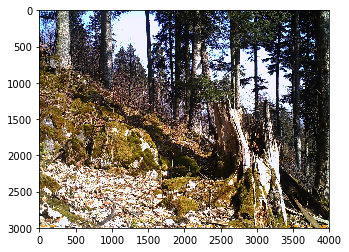

In [13]:
# Toto je důležité vložit nekomentované na začátek jupyter notebooku pro spuštění externího editoru sed3 i ginput
# % matplotlib qt

plt.imshow(img)
# left mouse button - add point
# right mouse button - remove last point
# middle mouse button - finish
plt.ginput(-1)

# Práce s daty ve formě tabulek

Doporučujeme balík pandas

[ukázka](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%205%20-%20Combining%20dataframes%20and%20scraping%20Canadian%20weather%20data.ipynb)

[tutorialy](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

[vizualizace](http://wavedatalab.github.io/datawithpython/visualize.html)


## Uložení

In [1]:
import pandas as pd

df = pd.DataFrame({
        'time':[1.0, 2.0, 3., 2., 3., 4.],
        'id': [1, 1, 1, 2, 2, 2],
        'x_px': [10, 12, 13, 5, 8, 10],
        'y_px': [11, 10, 12, 5, 7, 6],
    }
)
df.to_csv('vystup.csv')

## Načítání

In [31]:
df =pd.read_csv('vystup.csv', index_col=0)
df

time  id  x_px  y_px
0   1.0   1    10    11
1   2.0   1    12    10
2   3.0   1    13    12
3   2.0   2     5     5
4   3.0   2     8     7
5   4.0   2    10     6

## Řazení

In [32]:
df.sort_values(["time", "id"])

time  id  x_px  y_px
0   1.0   1    10    11
1   2.0   1    12    10
3   2.0   2     5     5
2   3.0   1    13    12
4   3.0   2     8     7
5   4.0   2    10     6

## Výběr řádků

In [3]:
import numpy as np
# df['x_px'][1:].ast
# df['x_px'][:-1] 
dfid2 = df[df['id'] == 2]
dfid2

time  id  x_px  y_px
3   2.0   2     5     5
4   3.0   2     8     7
5   4.0   2    10     6

## Výběr sloupců

In [6]:
df2 = df[['x_px', 'y_px']]
df2

x_px  y_px
0    10    11
1    12    10
2    13    12
3     5     5
4     8     7
5    10     6

## Statistika nad sloupci

In [7]:
df['x_px'].mean()


9.666666666666666

## New column

In [4]:
df ['soucin'] = df['x_px'] * df['y_px']
df

time  id  x_px  y_px  soucin
0   1.0   1    10    11     110
1   2.0   1    12    10     120
2   3.0   1    13    12     156
3   2.0   2     5     5      25
4   3.0   2     8     7      56
5   4.0   2    10     6      60

## Přejmenování sloupců

In [11]:
df3 = df2.rename(columns={"x_px": 'X_px', 'y_px': "Y_px"})
df3

X_px  Y_px
0    10    11
1    12    10
2    13    12
3     5     5
4     8     7
5    10     6

## Práce s jednotlivými buňkami

In [14]:
df3["new column"] = 0

In [17]:
for i in range(0, len(df3['Y_px'])):
    df3.loc[i]["new column"] = df3.iloc[i]["X_px"] + 5
    
df3

X_px  Y_px  new column
0    10    11          15
1    12    10          17
2    13    12          18
3     5     5          10
4     8     7          13
5    10     6          15

## Grafy



In [2]:
import seaborn as sns

<AxesSubplot:xlabel='id', ylabel='x_px'>

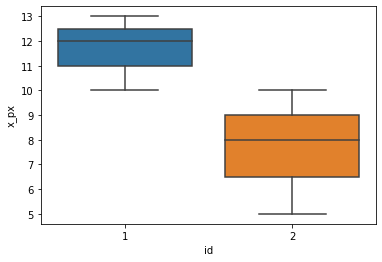

In [3]:
sns.boxplot(data=df, x="id", y="x_px")

<AxesSubplot:xlabel='x_px', ylabel='y_px'>

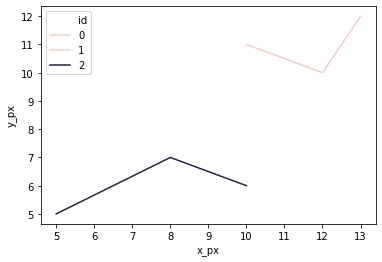

In [34]:
sns.lineplot(data=df, x="x_px", y="y_px", hue="id")


[seaborn with titatinc](https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/)

# Práce s moduly v pythonu

## jak správně organizovat modul

Veškerý kód by měl být uzavřený ve funkcích

In [ ]:
import numpy as np
    
def main():
    print np.random.random([3,4])
        
if __name__ == "__main__":
    main()

## Parserování vstupů

[argparser](https://docs.python.org/2/howto/argparse.html)

In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("-i", '--inputdata', help="input data directory")
parser.add_argument('-dt', '--time')
parser.add_argument('-d', '--debug', action="store_true")

args = parser.parse_args()

args.inputdata
args.time

if args.debug:
    print "debugovaci rezim"



# Potřebujete mapu?

Balík folio

        conda install -c ioos folio


[příklad](https://app.dominodatalab.com/r00sj3/crimemaps/view/examples.ipynb)

[rozsáhlý příklad](https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/)

In [ ]:
import folium
from IPython.display import HTML

map1 = folium.Map(location=[49.726578, 13.352427])
folium.Marker([49.726578, 13.352427], popup='FAV').add_to(map1)
# m.add_children(folium.Marker([49.726578, 13.352427]))
map1

In [ ]:
map1.save("map.html")